# Kappa map for lattices
This is a manual of [kappa.py](kappa.py).

AUTHOR:
[Haruhisa Enomoto](http://haruhisa-enomoto.github.io/)

REFERENCES:

- [BCZ] E. Barnard, G. Todorov, S. Zhu,
  Dynamical Combinatorics and Torsion Classes,
  J. Pure Appl. Algebra 225 (2021), no. 9, 106642.
- [RST] N. Reading, D. E. Speyer, H. Thomas,
  The fundamental theorem of finite semidistributive lattices,
  arXiv:1907.08050.

[kappa.py](kappa.py) adds to a Sage class [`sage.combinat.posets.lattices.FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset) class methods
- `kappa`
- `extended_kappa`
- `kappa_dual`
- `extended_kappa_dual`

[kappa](#kappa)
which compute the kappa map, the extended kappa maps, and their duals respectively.

First, load it.

In [1]:
load("kappa.py")

By loading it, we can use the above methods for an instance of a Sage class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset).

## Kappa map

Let $L$ be a finite lattice. An element $j$ of $L$ is *join-irreducible*
if $j = \bigvee A$ for a subset $A$ of $L$ implies $j \in A$.
This is equivalent to that there is a unique element $j_*$ which is covered by $j$.
Dually, we define *meet-irreducible* elements.

A *kappa map $\kappa(j)$* for a join-irreducible element $j$ of $L$ is defined, if exists, as a *maximum* element
$x$ satisfying $j_* \leq x$ and $j \not \leq x$. Then $\kappa(j)$ is meet-irreducible if exists
(see e.g. [RST, Theorem 2.28]).

### kappa(j, check = True)
Return $\kappa(j)$ for a join-irreducible element $j$
of a finite lattice ``self`` if it exists.

INPUT:
 - ``j`` -- an element of ``self``,
      which is expected to be join-irreducible

 - ``check`` -- a Boolean (default: `True`),
      whether to check that ``j`` is indeed join-irreducible

OUTPUT:

an element of ``self``, or `None` if it does not exist.

#### See also
A method [`sage.combinat.posets.hasse_diagram.HasseDiagram.kappa`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/hasse_diagram.html#sage.combinat.posets.hasse_diagram.HasseDiagram.kappa)

EXAMPLE:

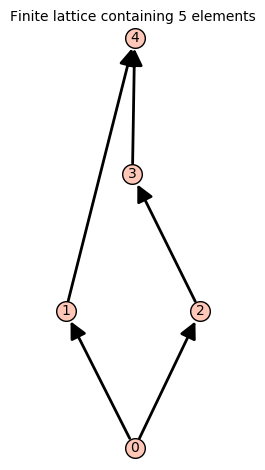

In [2]:
L = posets.PentagonPoset()
L

In [3]:
L.kappa(1)

3

In [4]:
L.kappa(4)

ValueError: 4 is not join-irreducible.

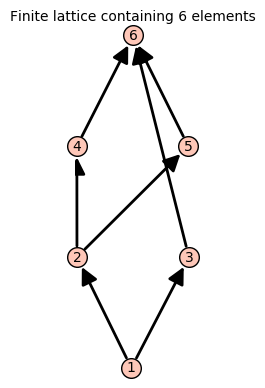

In [5]:
L_new = LatticePoset({1: [2, 3], 2: [4, 5], 3: [6], 4: [6], 5: [6]})
L_new

In [6]:
L_new.kappa(2)

3

In [7]:
L_new.kappa(3) is None

True

## Dual kappa map

Let $m$ be a meet-irreducible element in a finite lattice $L$, and $m_*$ a unique element covering $m$.
A *dual kappa map $\kappa^d(m)$* for a meet-irreducible element $j$ of $L$ is defined, if exists, as a *minimum* element
$x$ satisfying $x \leq m_*$ and $x \not \leq m$. Then $\kappa^d(m)$ is join-irreducible if exists.
Moreover, $\kappa$ and $\kappa^d$ are mutually inverse bijecionts between the set of join-irreducibles and meet-irreducibles if and only if
$L$ is semidistributive, see e.g. [RST Corollary 2.29].

### kappa_dual(m, check = True)
Return $\kappa^d(m)$ for a meet-irreducible element $m$
in a finite lattice if it exists.

INPUT:
 - ``m`` -- an element of ``self``,
      which is expected to be meet-irreducible

 - ``check`` -- a Boolean (default: `True`),
      whether to check that ``m`` is indeed join-irreducible

OUTPUT:

an element of ``self``, or `None` if it does not exist.

#### See also
A method [`sage.combinat.posets.hasse_diagram.HasseDiagram.kappa_dual`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/hasse_diagram.html#sage.combinat.posets.hasse_diagram.HasseDiagram.kappa_dual)

EXAMPLE:

In [8]:
L = posets.PentagonPoset()
L.kappa_dual(3)

1

## Extended (dual) kappa map

An *extended kappa map $\overline{\kappa}(x)$* for an element $x$ of a finite lattice $L$ is defined as follows. First, let $x = j_1 \vee \cdots \vee j_n$ be a canonical join representation of $x$ if exists. Then $\overline{\kappa}(x) := \kappa(j_1) \wedge \cdots \wedge \kappa(j_n)$ if $\kappa(j_1), \dots, \kappa(j_n)$ are defined. This map is well-defined if $L$ is semidistributive.

An *extended dual kappa map* $\overline{\kappa^d}(x)$ is defined completely dually. This map is well-defined and is an inverse of $\overline{\kappa}$ if $L$ is semidistributive.

### extended_kappa(x)
Return $\overline{\kappa}(x)$ for an element $x$
of a finite lattice ``self`` if it exists.

INPUT:

- ``x`` -- an element of ``self``

OUTPUT:

an element of ``self``, or `None` if it does not exist.

REFERENCE:

- [BCZ Definition 4.4.1]

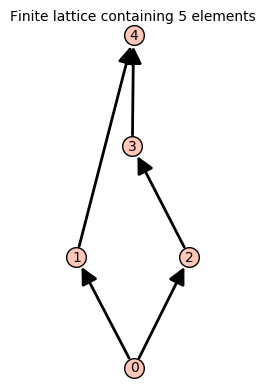

In [9]:
L = posets.PentagonPoset()
L

In [10]:
for x in L:
    print(f"extended_kappa({x}) is {L.extended_kappa(x)}")

extended_kappa(0) is 4
extended_kappa(1) is 3
extended_kappa(2) is 1
extended_kappa(3) is 2
extended_kappa(4) is 0


### extended_kappa_dual(x)
Return $\overline{\kappa^d}(x)$ for an element $x$
in a finite lattice ``self`` if it exists.

INPUT:

- ``x`` -- an element of ``self``

OUTPUT:

an element of ``self``, or `None` if it does not exist.

REFERENCE:

- [BCZ Definition 4.4.1]

EXAMPLE:

In [11]:
L = posets.PentagonPoset()
for x in L:
    print(f"extended_kappa_dual({x}) is {L.extended_kappa_dual(x)}")

extended_kappa_dual(0) is 4
extended_kappa_dual(1) is 2
extended_kappa_dual(2) is 3
extended_kappa_dual(3) is 1
extended_kappa_dual(4) is 0
